In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression , Lasso

In [ ]:
df = pd.read_csv('car data.csv')

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.shape

(301, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
df.isna().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [ ]:
df.replace({'Fuel_Type' : {'Petrol' : 0, 'Diesel' : 1, 'CNG' : 2}}, inplace=True)
df.replace({'Seller_Type' : {'Dealer' : 0, 'Individual' : 1}}, inplace=True)
df.replace({'Transmission': {'Manual' : 0, 'Automatic': 1}} , inplace=True)

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
X = df.drop(['Car_Name', 'Selling_Price'], axis = 1)

In [ ]:
print(X)

     Year  Present_Price  Kms_Driven  ...  Seller_Type  Transmission  Owner
0    2014           5.59       27000  ...            0             0      0
1    2013           9.54       43000  ...            0             0      0
2    2017           9.85        6900  ...            0             0      0
3    2011           4.15        5200  ...            0             0      0
4    2014           6.87       42450  ...            0             0      0
..    ...            ...         ...  ...          ...           ...    ...
296  2016          11.60       33988  ...            0             0      0
297  2015           5.90       60000  ...            0             0      0
298  2009          11.00       87934  ...            0             0      0
299  2017          12.50        9000  ...            0             0      0
300  2016           5.90        5464  ...            0             0      0

[301 rows x 7 columns]


In [ ]:
Y = df['Selling_Price']

In [ ]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [ ]:
X_train , X_test , Y_train, Y_test = train_test_split(X, Y , test_size=0.1 , random_state=69 )

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train , Y_train)

LinearRegression()

In [ ]:
training_pred = lin_reg.predict(X_train)

In [ ]:
error_score = metrics.r2_score(Y_train, training_pred)
print("R square Error : ", error_score)

R square Error :  0.876976864191979


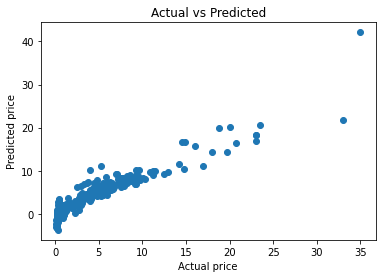

In [ ]:
plt.scatter(Y_train, training_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
testing_pred = lin_reg.predict(X_test)


In [ ]:
error_score1 = metrics.r2_score(Y_test, testing_pred)
print("R square Error : ", error_score1)

R square Error :  0.9068200138988795


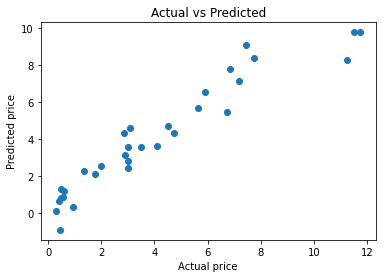

In [ ]:
plt.scatter(Y_test, testing_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
lasso_reg = Lasso()
lasso_reg.fit(X_train , Y_train)

Lasso()

In [ ]:
training_pred1 = lasso_reg.predict(X_train)

In [ ]:
error_score2 = metrics.r2_score(Y_train , training_pred1)
print(error_score2)

0.8429218618531955


<function matplotlib.pyplot.show>

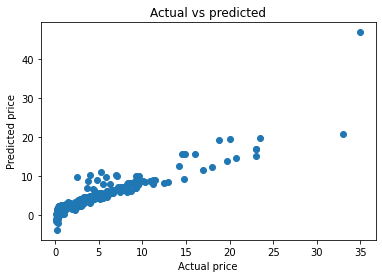

In [ ]:
plt.scatter(Y_train, training_pred1)
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual vs predicted")
plt.show

In [ ]:
testing_pred1 = lasso_reg.predict(X_test)
print(testing_pred1)

[9.97738644 1.84871555 7.01836594 4.76350263 5.06888784 4.3302002
 4.18699627 3.21103499 1.36964551 2.82303365 5.88626194 0.15482826
 1.31166133 8.59644435 3.92847471 3.43926196 4.35418693 8.7447923
 1.53118399 8.44569033 5.49168301 1.83002381 0.90785263 2.60344218
 7.15925777 1.49416093 2.59462522 2.72994667 2.87290325 5.63390468
 6.43313426]


In [ ]:
error_score3 = metrics.r2_score(Y_test , testing_pred1)
print(error_score3)

0.8475521475373855


<function matplotlib.pyplot.show>

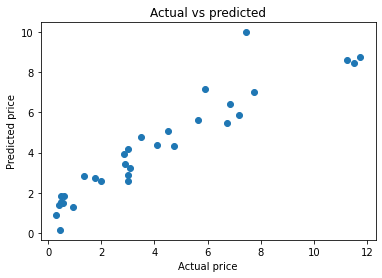

In [ ]:
plt.scatter(Y_test , testing_pred1)
plt.xlabel("Actual price")
plt.ylabel('Predicted price')
plt.title('Actual vs predicted')
plt.show